In [49]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [50]:
lines = open('time_old').readlines()

In [51]:
datasets = lines[0::10]
rust_time = lines[2::10]
rust_mem = lines[3::10]
python_time = lines[6::10]
python_mem = lines[7::10]

In [52]:
def extract_number(iter):
    return np.array([float(re.search(r'\d+\.?\d+', x).group(0)) for x in iter])

def extract_tree_size(iter):
    return np.array([int(re.search(r'tree_(\d+)', x).group(1)) for x in iter])

In [53]:
extract_number(python_time)

array([  25.21,   52.65,   82.34,  207.13, 1220.41, 2226.34, 5072.48])

In [54]:
extract_tree_size(datasets)

array([  10,   20,   30,  100,  500, 1000, 2000])

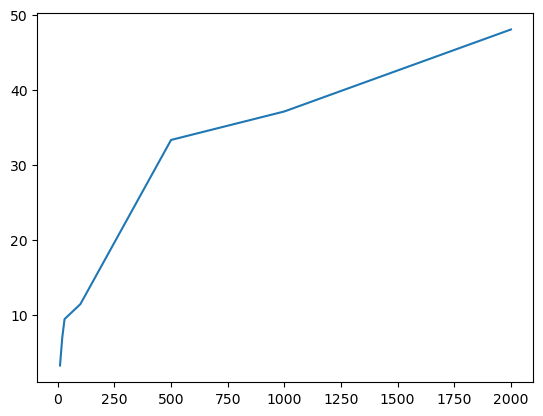

In [44]:
plt.plot(extract_tree_size(datasets), extract_number(python_time) / extract_number(rust_time), label='Python')

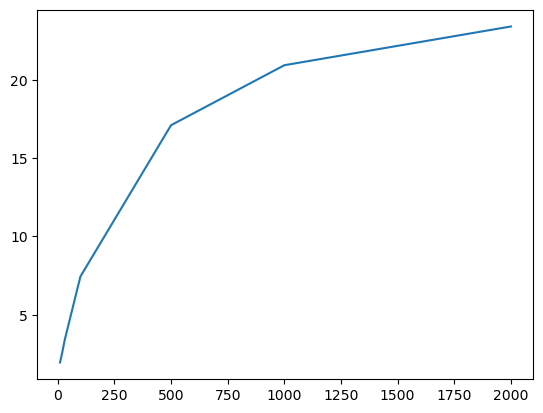

In [46]:
plt.plot(extract_tree_size(datasets), extract_number(python_mem) / extract_number(rust_mem), label='Python')

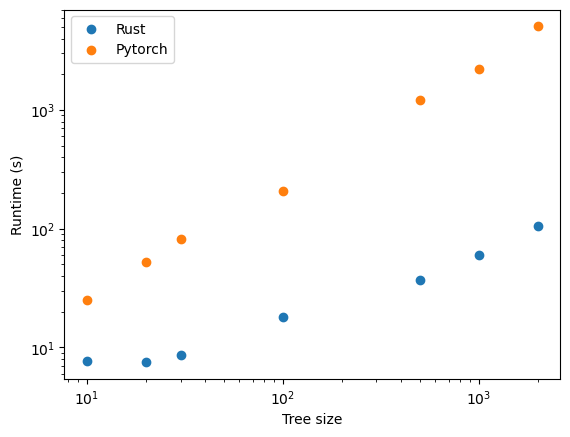

In [60]:
ax = plt.gca()

ax.scatter(extract_tree_size(datasets), extract_number(rust_time), label='Rust')
ax.scatter(extract_tree_size(datasets), extract_number(python_time), label='Pytorch')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Tree size')
ax.set_ylabel('Runtime (s)')
ax.legend()

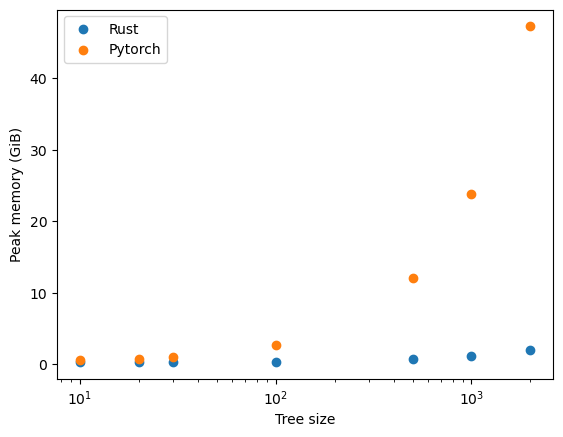

In [64]:
ax = plt.gca()

ax.scatter(extract_tree_size(datasets), extract_number(rust_mem) / 1024**2, label='Rust')
ax.scatter(extract_tree_size(datasets), extract_number(python_mem) / 1024**2, label='Pytorch')
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Tree size')
ax.set_ylabel('Peak memory (GiB)')
ax.legend()